In [1]:
from libs.edgelistParser import edgelistParser
from libs.utils import list2matrix
from libs.page_rank import approximateSimrank, localPageRank
from libs.plotNetwork import plotNetworkClusters
import numpy as np
from matplotlib import pyplot as plt
import heapq as hq
import networkx as nx

In [2]:
# load the Facebook dataset
A, N, D = edgelistParser("datasets/facebook/0.edges", "raw_list")

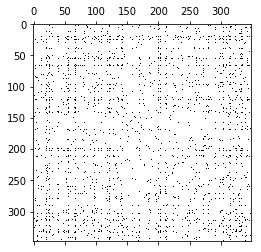

In [3]:
# convert the edge list to a dense matrix
A_mat = list2matrix(A)
plt.figure()
plt.spy(A_mat)
plt.show()

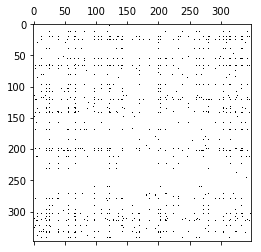

In [4]:
# generate the L matrix
L = localPageRank(A, c=0.85, use_only_neighbours=True)
L_mat = list2matrix(L)
plt.figure()
plt.spy(L_mat)
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


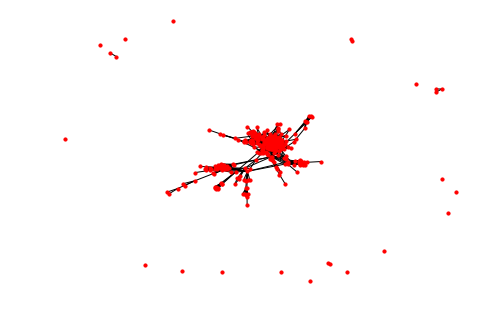

In [5]:
# test the network plot
g = nx.Graph(A_mat)
plt.figure()
nx.draw_spring(g, node_size=10)
plt.show()

In [6]:
# the function computes the network clustering
def cluster(L_norm, centroids, alpha, A):  
    # initialize the output vector with the clusters
    clusters = - np.ones(len(L_norm))
    
    pos = None
    
    # initialize the heap queues related to the clusters
    queues = []
    
    # insert centroids in the queues, e.g. (expansions, (node, rank))
    for i in range(centroids.size):
        queue = []
        hq.heappush(queue, (0, (centroids[i], 1)))
        queues.append(queue)
        
        # set the centroid cluster
        clusters[centroids[i]] = centroids[i]
    
    # iterate until all the nodes are assigned to the clusters   
    exit_ext = False
    while not exit_ext:
        #
        cumulative_length = 0
        for queue in queues:
            # assign the new expansions
            for i, node in enumerate(queue):
                # ensure at least one expansion per node
                expansions = max(1, np.round(alpha*node[1][1])) # TODO: eventually change the round function
                
                # modify the queue element with the new expansions
                queue[i] = (
                    - expansions,
                    (node[1][0], node[1][1])
                )
            
            # restore the queue
            hq.heapify(queue)
            
            #print(queue)
        
            # expand the cluster boundary toward the high ranked nodes
            exit_int = False
            while (not exit_int) and len(queue)>0: # TODO: check correctness
                # pop a node that should be expanded 
                node = hq.heappop(queue)
                #print("popped")
                
                # check the termination condition
                expansions_opp = node[0]
                if expansions_opp==0:
                    # no more nodes to expand
                    exit_int = True
                else:
                    #print("else")
                    # reduce the remained number of expansions
                    expansions_opp += 1
                    
                    # TODO: exploit the edgelist to enhance efficiency and ensure correctness
                    # expand the neighbourhood and assign the new expansions
                    #print("where", np.where(L[node[1][0],:]>0)[0])
                    for edge in L_norm[node[1][0]]:
                        #print(neighbour)
                        neighbour = edge[0]
                        # assign the node to the cluster
                        if clusters[neighbour]<0:
                            #print("assigned")
                            clusters[neighbour] = clusters[node[1][0]]
                            
                            # add the node to the queue
                            rank = edge[1]
                            hq.heappush(
                                queue,
                                (
                                    np.round(expansions_opp*rank), # TODO: eventually change the round function
                                    (neighbour, rank)
                                )
                            )
                            
            # TODO: check
            cumulative_length += len(queue) 
        
        exit_ext = cumulative_length==0
    
        # test plot <-> CLUSTERS SHOULD BE A LIST!
        pos = plotNetworkClusters(A, list(clusters.astype(int)), 5, draw_edges=False, pos=pos)
        
    # return the vector with the clusters
    return clusters

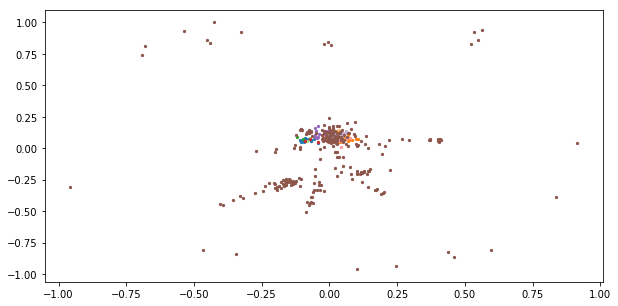

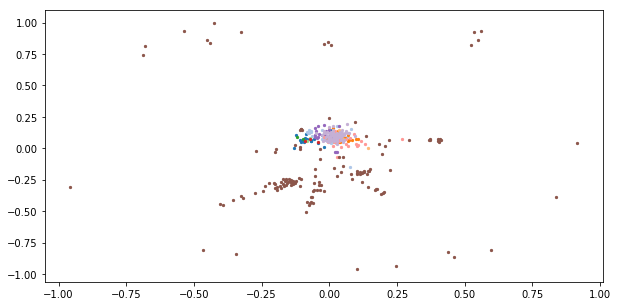

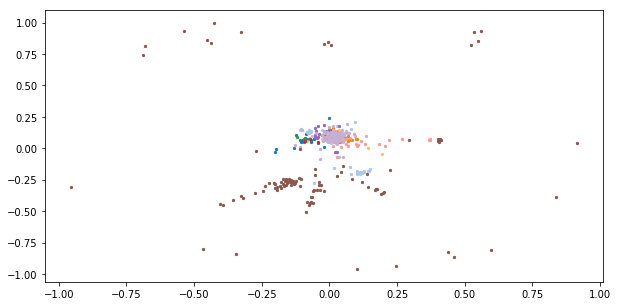

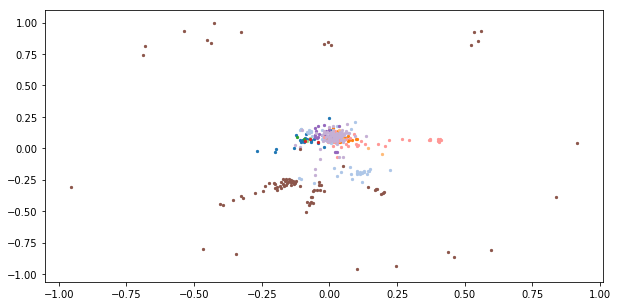

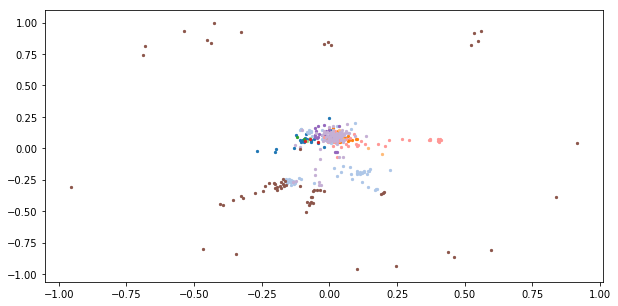

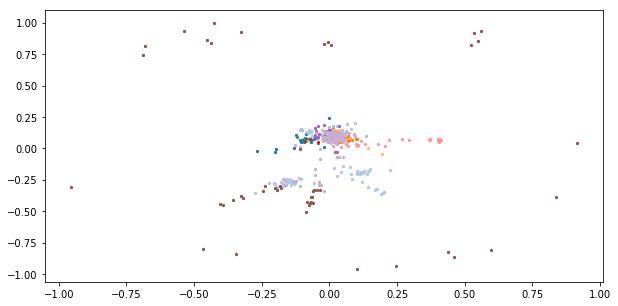

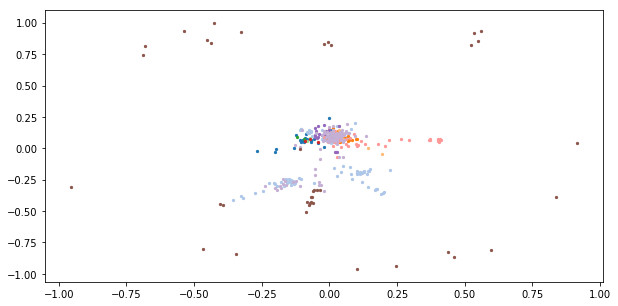

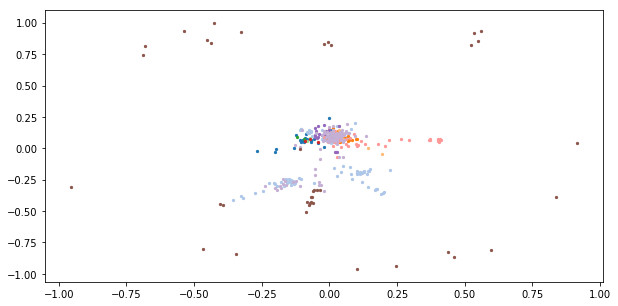

[ -1.  88. 134. 134. 148. 180.  -1.   7. 134. 134. 134.  -1.  -1.  59.
 134.  -1. 331. 134.  -1. 134.  59. 134.   7. 134. 101.  88. 134. 148.
 134.  59. 331.   7.  59.  -1. 101. 134. 134.  -1.   7. 134.  59.  59.
  -1.  -1. 134.  59. 134. 331.  88. 134. 148.  88. 134. 101. 101.  59.
  59. 302. 148.  59.  59. 134.  59.  59. 148.   7. 134. 134. 134. 134.
  59.  59.  59.  88.  -1.  59.  88. 331. 148.  59. 101. 148.  59.  88.
  59.  59. 134.   7.  88.  -1.  -1. 134. 101.  59. 101.  -1. 148.  59.
  59. 134. 148. 101. 134.   7.  59. 148.  88. 148. 134. 148. 134.  59.
  -1. 134.  -1. 134. 134.   7.  59. 148. 134.  59.  59.  59.  59. 148.
  88. 134.  59.   7.  88. 134. 134.  59. 134. 134.   7.  59.  -1.  59.
 134.  59. 134. 134. 134.  -1. 148.  -1. 148. 134. 148. 134. 148.  59.
  -1. 134. 134. 134.  59.  59. 101.  59. 134. 101.  88.  59. 101.  59.
   7.  59.  59. 148.  59. 101.  -1. 134. 148. 134.  88.  -1. 180. 148.
  59.  59. 134. 148.  59. 101.  59. 148. 148. 101. 134. 134. 101. 148.
 180. 

In [7]:
# normalize the rows of L
#L_norm = L/np.sum(L, 1)
#L_norm[np.logical_not(np.isfinite(L_norm))] = 0

# test the clustering algorithm
print(cluster(L, np.array([59, 134, 101, 88, 180, 148, 299, 7, 331, 302]), 5, A_mat))

In [ ]:
print(np.argsort(np.sum(A_mat, 1)))

In [ ]:
print(np.sort(np.sum(A_mat, 1)))